<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/Tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chuẩn hóa pixel về [0, 1]
data = ImageDataGenerator(rescale=1.0/255)

# Load ảnh từ thư mục -> batch
generator = data.flow_from_directory(
    '//content/drive/MyDrive/tien',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

# Load dữ liệu kiểm tra
test_generator = data.flow_from_directory(
    '/content/drive/MyDrive/tien',
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=10000,
    shuffle=False
)

class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
X_batch, y_batch = next(generator)
X_batch_flat = X_batch.reshape(X_batch.shape[0], -1)


x_train, y_train = next(generator)
x_test, y_test = next(test_generator)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

model = Sequential([
    Dense(256, activation='relu', input_shape=(32*32*3,)),
    Dense(128, activation='relu'),
    Dense(len(class_labels), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_test, y_test))

Found 96 images belonging to 10 classes.
Found 96 images belonging to 10 classes.
Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0938 - loss: 2.4039 - val_accuracy: 0.0729 - val_loss: 3.5312
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.1250 - loss: 3.0148 - val_accuracy: 0.1042 - val_loss: 3.4313
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.1875 - loss: 3.2425 - val_accuracy: 0.1042 - val_loss: 3.3121
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.0625 - loss: 3.5515 - val_accuracy: 0.1042 - val_loss: 3.0187
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.0938 - loss: 3.1978 - val_accuracy: 0.1458 - val_loss: 2.6921
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.1875 - loss: 2.5758 - val_accuracy: 0.1146 - val_loss: 2.6205
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.2188 - loss: 2.1858 - val_accuracy: 0.1354 - val_loss: 2.8029
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.2812 - loss: 2.1337 - val_accuracy: 0.0938 - val_loss: 3.

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('test_acc:%.2f'%(test_acc*100))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4661 - loss: 3.0455
test_acc:51.04


In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('test_acc:%.2f'%(test_acc*100))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Dự đoán là: 5000d


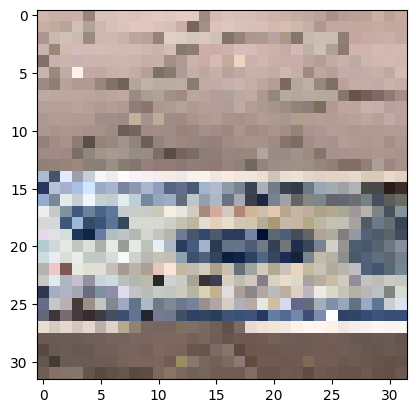

In [4]:
image_path = '/content/drive/MyDrive/tien/5000d/t2.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dự đoán là: 500d


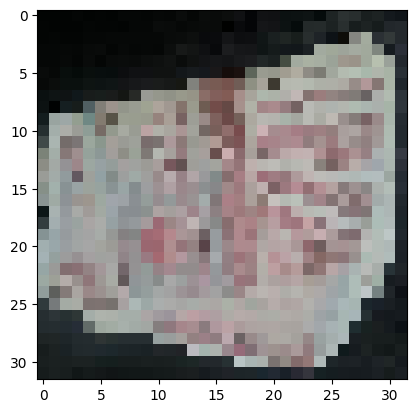

In [6]:
image_path = '/content/drive/MyDrive/tien/500d/t3.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dự đoán là: 50k


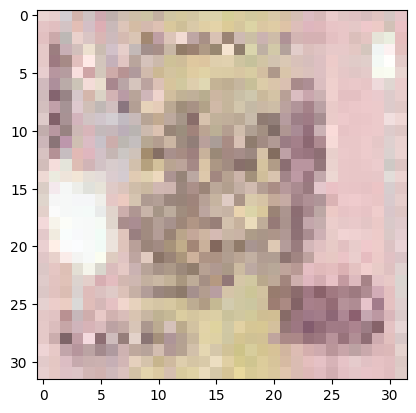

In [7]:
image_path = '/content/drive/MyDrive/tien/50k/t3.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Dự đoán là: 500k


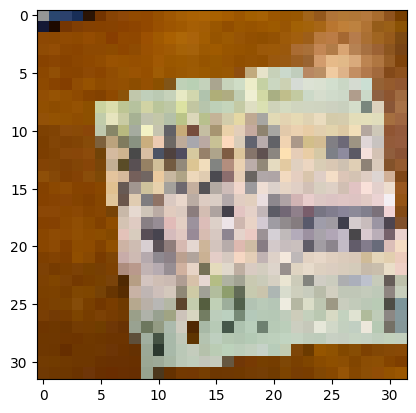

In [10]:
image_path = '/content/drive/MyDrive/tien/500k/t2.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Dự đoán là: 200k


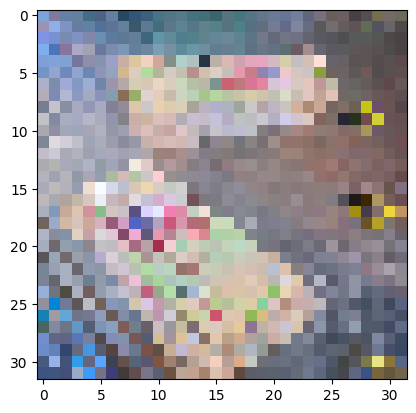

In [14]:
image_path = '/content/drive/MyDrive/tien/200k/t6.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Dự đoán là: 20k


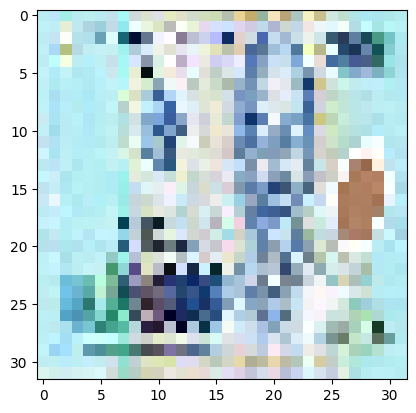

In [15]:
image_path = '/content/drive/MyDrive/tien/20k/t3.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Dự đoán là: 1000d


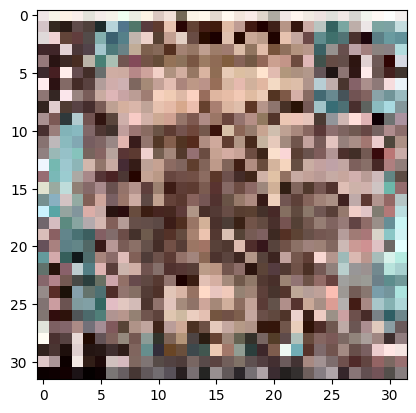

In [16]:
image_path = '/content/drive/MyDrive/tien/2000d/t3.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Dự đoán là: 100k


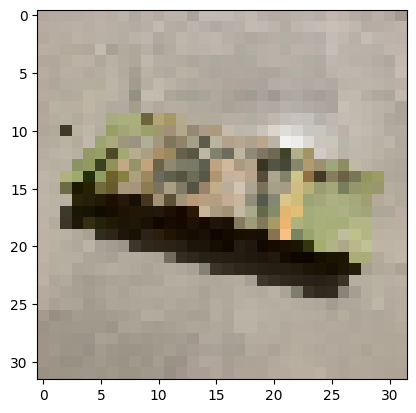

In [18]:
image_path = '/content/drive/MyDrive/tien/100k/t4.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Dự đoán là: 10k


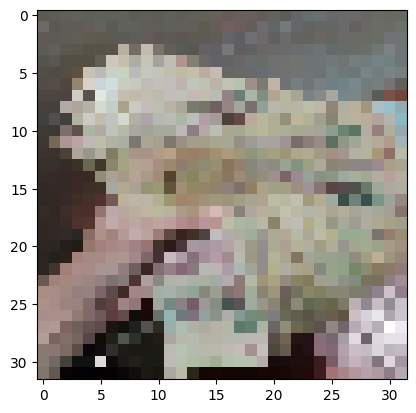

In [19]:
image_path = '/content/drive/MyDrive/tien/10k/t3.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Dự đoán là: 1000d


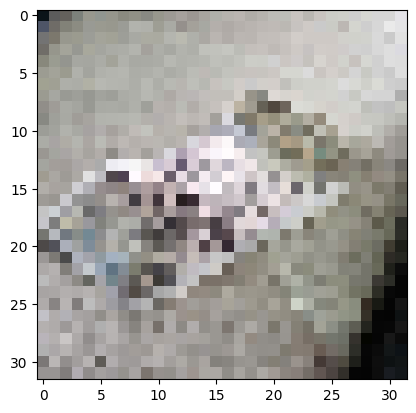

In [20]:
image_path = '/content/drive/MyDrive/tien/1000d/t3.jpg'
img = load_img(image_path, target_size=(32, 32))
plt.imshow(img)
img_array = img_to_array(img) / 255.0
img_flatten = img_array.reshape(1, 32*32*3)
y_pred_prob = model.predict(img_flatten)
predicted_index = np.argmax(y_pred_prob)
class_labels = ['1000d', '100k', '10k', '2000d', '200k','20k','5000d','500d','500k','50k']
print("Dự đoán là:", class_labels[predicted_index])